In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import csv
from utils.preprocess_utils import preprocess_row
from spacy.lang.en import English
from tqdm import tqdm

duplicates = 0
invalid_rows = 0
invalid_years = 0
abstracts_missing = 0
tokens_per_abstract = []
valid_docs_per_year = {}

nlp = English()
tokenizer = nlp.tokenizer

for year in range(2014, 2025):
    abstract_lookup = set()
    print(f"processing year {year} ...")
    with open(f"{module_path}/data/studies/studies_{year}.csv", encoding="utf-8") as input_csv:
        reader = csv.DictReader(input_csv)
        reader_len = 0
        for row in reader:
            reader_len += 1
        input_csv.seek(0)
        next(reader)
        for row in tqdm(reader, total=reader_len):
            try:
                row = preprocess_row(row)
            except ValueError:
                invalid_rows += 1
                continue

            try:
                int(row["Year"])
            except ValueError:
                invalid_years += 1
                continue

            if row["Abstract"] == "NA" or row["Abstract"] == "":
                abstracts_missing += 1
                continue

            if row["Abstract"] in abstract_lookup:
                duplicates += 1
                continue
            else:
                abstract_lookup.add(row["Abstract"])

            valid_docs_per_year.setdefault(str(year), 0)
            valid_docs_per_year[str(year)] += 1
            tokens_per_abstract.append(len(tokenizer(row["Abstract"])))

processing year 2014 ...


100%|██████████| 337297/337297 [02:00<00:00, 2791.75it/s]


processing year 2015 ...


100%|██████████| 334353/334353 [01:49<00:00, 3056.02it/s]


processing year 2016 ...


100%|██████████| 346580/346580 [01:57<00:00, 2945.29it/s]


processing year 2017 ...


100%|██████████| 323600/323600 [01:59<00:00, 2713.83it/s]


processing year 2018 ...


100%|██████████| 324694/324694 [02:28<00:00, 2191.00it/s]


processing year 2019 ...


100%|██████████| 389427/389427 [03:09<00:00, 2050.91it/s]


processing year 2020 ...


100%|██████████| 469698/469698 [03:32<00:00, 2207.24it/s]


processing year 2021 ...


100%|██████████| 486563/486563 [03:49<00:00, 2124.54it/s]


processing year 2022 ...


100%|██████████| 484997/484997 [03:51<00:00, 2093.72it/s]


processing year 2023 ...


100%|██████████| 419869/419869 [03:44<00:00, 1868.57it/s]


processing year 2024 ...


100%|██████████| 90438/90438 [00:52<00:00, 1736.23it/s]


In [3]:
del abstract_lookup

In [4]:
import numpy as np

print(f"duplicates: {duplicates}")
print(f"invalid_rows: {invalid_rows}")
print(f"invalid_years: {invalid_years}")
print(f"abstracts_missing: {abstracts_missing}")
print(f"total_valid_docs: {np.sum(list(valid_docs_per_year.values()))}")
print(f"mean_tokens: {np.mean(tokens_per_abstract)}")
print(f"std_tokens: {np.std(tokens_per_abstract)}")
print(f"max: {np.max(tokens_per_abstract)}")
print(f"min: {np.min(tokens_per_abstract)}")
print(f"5% quantile: {np.quantile(tokens_per_abstract, 0.05)}")
print(f"25% quantile: {np.quantile(tokens_per_abstract, 0.25)}")
print(f"50% qunatile: {np.quantile(tokens_per_abstract, 0.5)}")
print(f"75% quantile: {np.quantile(tokens_per_abstract, 0.75)}")
print(f"95% quantile: {np.quantile(tokens_per_abstract, 0.95)}")

duplicates: 469808
invalid_rows: 1
invalid_years: 5660
abstracts_missing: 311449
total_valid_docs: 3220598
mean_tokens: 169.3231794219583
std_tokens: 118.85919842718796
max: 15605
min: 1
5% quantile: 27.0
25% quantile: 61.0
50% qunatile: 158.0
75% quantile: 257.0
95% quantile: 366.0


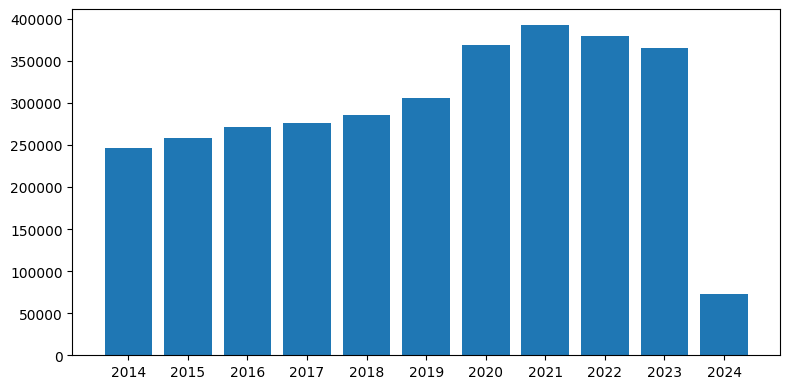

In [5]:
import matplotlib.pyplot as plt

sorted_years_counts = sorted(valid_docs_per_year.items(), key=lambda item: item[0])
years = [year for year, _ in sorted_years_counts]
counts = [count for _, count in sorted_years_counts]

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(years, counts)
fig.tight_layout()
fig.savefig(f"{module_path}/data_extraction/bar_chart_docs_per_year.png")

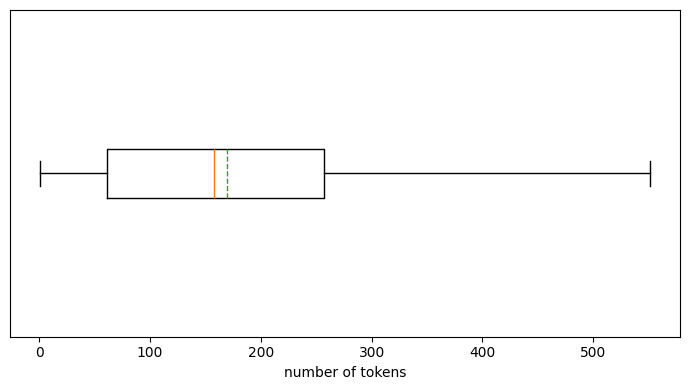

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 4))
ax.boxplot(tokens_per_abstract, vert=False, showmeans=True, meanline=True, showfliers=False)
ax.set_xlabel("number of tokens")
ax.get_yaxis().set_visible(False)
fig.tight_layout()
fig.savefig(f"{module_path}/data_extraction/boxplot_tokens_per_abstract.png")